# DCBC model evaluation

In [115]:

import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.functional_profiles as fp
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats
import glob
import numpy as np
import os



In [199]:
# Import Data
Data = pd.read_csv(f'{ut.model_dir}/Models/Evaluation/evaluation_dcbc.tsv', sep='\t')

# Make a unique subject identifier by combining subject and test_data columns
Data['subj_id'] = Data['test_data'] + '_' + Data['subj_num'].astype(str)
# Drop columns that are not needed
superfluous_columns=['model_name', 'atlas', 
       'indivtrain_ind', 'indivtrain_val', 'common_kappa',
       'model_type', 'session', 'coserr_group',
       'coserr_floor', 'coserr_ind2', 'coserr_ind3',
       'train_data_string', 'test_sess', 'train_data_len', 'train_data']
Data = Data.drop(columns=superfluous_columns)
# Subset granularities
Data = Data
Data.head()

trainings = ['Leave_one_out', 'Single']


,K,train_loglik,test_data,subj_num,dcbc_group,dcbc_indiv,symmetry,Training,subj_id
0,10,18011592.0,MDTB,0,0.057910,0.086540,Symmetric,All,MDTB_0
1,10,18011592.0,MDTB,1,0.021599,0.130579,Symmetric,All,MDTB_1
2,10,18011592.0,MDTB,2,0.005105,0.051347,Symmetric,All,MDTB_2
3,10,18011592.0,MDTB,3,0.124152,0.263768,Symmetric,All,MDTB_3
4,10,18011592.0,MDTB,4,0.115401,0.022575,Symmetric,All,MDTB_4


In [117]:
# Define colours
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes_single = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes_single, 2)

# Group DCBC and Individual DCBC in one plot for Fusion atlas

In [118]:
# Melt Data
Data_melted = pd.melt(Data[Data['Training']=='Leave_one_out'], id_vars=['K', 'Training', 'symmetry'], value_vars=['dcbc_group', 'dcbc_indiv'], var_name='dcbc_type', value_name='DCBC')
Data_melted.head()

,K,Training,symmetry,dcbc_type,DCBC
0,10,Leave_one_out,Symmetric,dcbc_group,0.038595
1,10,Leave_one_out,Symmetric,dcbc_group,0.012023
2,10,Leave_one_out,Symmetric,dcbc_group,-0.009863
3,10,Leave_one_out,Symmetric,dcbc_group,0.108692
4,10,Leave_one_out,Symmetric,dcbc_group,0.120695


In [119]:
fusion_orange = '#ff7f0e'
fusion_orange = list(np.repeat(fusion_orange,2))

<Figure size 1000x2000 with 0 Axes>

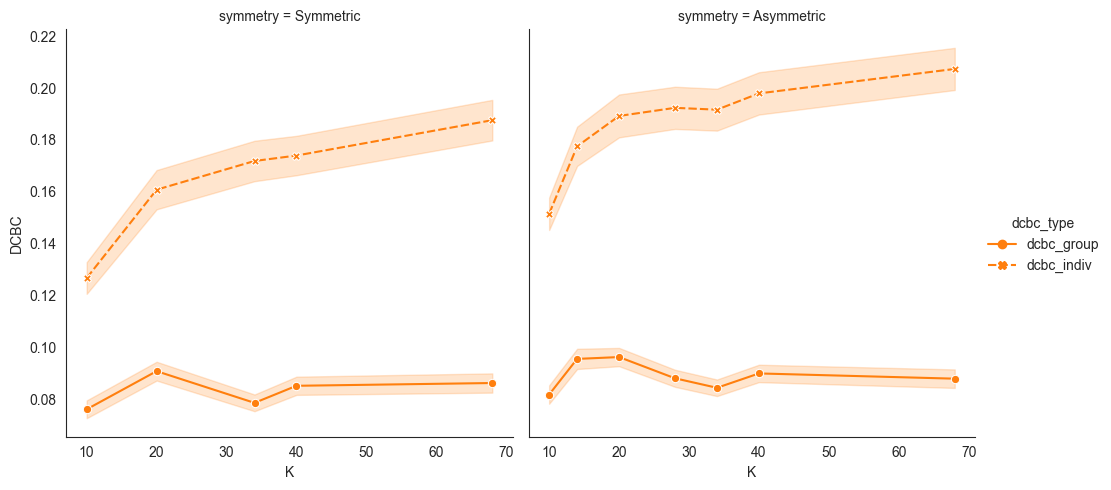

In [120]:
# Plot only fused DCBC results
hex_codes_fusion = np.repeat(hex_codes_single[1:], 4)
figsize = (10, 20)
plt.figure(figsize=figsize)
sb.set_style("white")
sb.relplot(
    data=Data_melted, x="K", y="DCBC", hue="dcbc_type", kind="line", col="symmetry", markers=True, errorbar="se", palette = fusion_orange, style="dcbc_type")
plt.savefig(f'{ut.figure_dir}/DCBC_group_indiv.pdf')


## DCBC Group: Single vs. Fusion atlas, Asymmetric vs Symmetric

In [200]:
# Average data within subject
Data_avg = Data.drop(columns=['test_data']).groupby(['subj_id', 'Training', 'symmetry']).mean().reset_index()
Data_avg


,subj_id,Training,symmetry,K,train_loglik,subj_num,dcbc_group,dcbc_indiv
0,Demand_0,All,Asymmetric,30.571429,1.882222e+07,0.0,0.087934,0.292586
1,Demand_0,All,Symmetric,34.400000,1.943828e+07,0.0,0.093833,0.266762
2,Demand_0,Leave_one_out,Asymmetric,30.571429,1.871350e+07,0.0,0.031544,0.281193
3,Demand_0,Leave_one_out,Symmetric,34.400000,1.923757e+07,0.0,0.014183,0.257633
4,Demand_0,Single,Asymmetric,30.571429,3.150874e+06,0.0,0.062109,0.227047
...,...,...,...,...,...,...,...,...
661,WMFS_9,All,Symmetric,34.400000,1.943828e+07,9.0,0.104754,0.228360
662,WMFS_9,Leave_one_out,Asymmetric,30.571429,1.915658e+07,9.0,0.106945,0.223077
663,WMFS_9,Leave_one_out,Symmetric,34.400000,1.975175e+07,9.0,0.098982,0.217770
664,WMFS_9,Single,Asymmetric,30.571429,3.235837e+06,9.0,0.057111,0.178683


<Axes: xlabel='Training', ylabel='dcbc_group'>

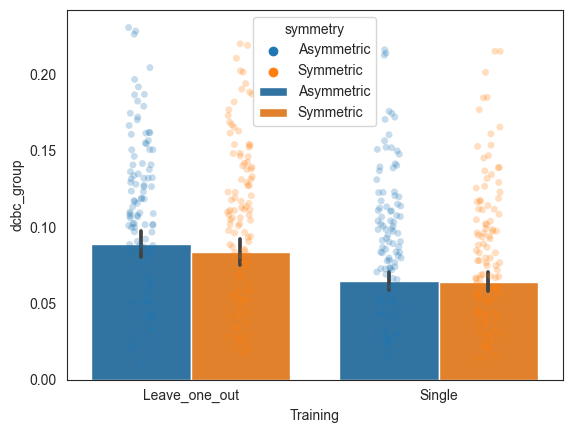

In [201]:
sb.barplot(data=Data_avg[(Data_avg['Training'].isin(trainings))], x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'])
sb.stripplot(data=Data_avg, x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'], jitter=True, dodge=True, alpha=0.25)



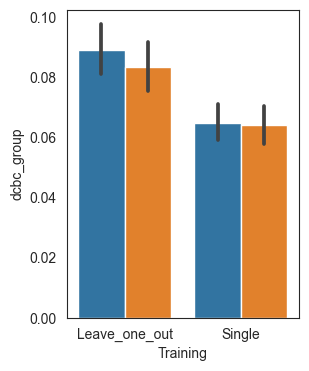

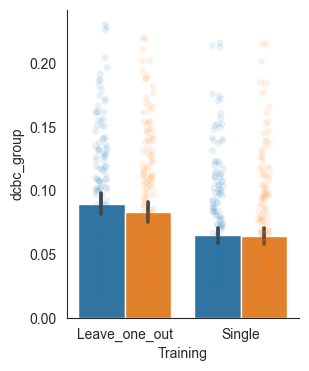

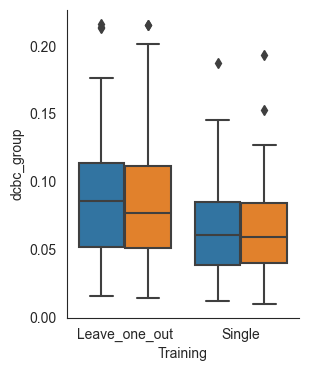

In [202]:
plt.figure(figsize=figsize)
sb.barplot(data=Data_avg[(Data_avg['Training'].isin(trainings))], x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'])
# Remove legend
plt.legend([],[], frameon=False)


plt.figure(figsize=figsize)
sb.barplot(data=Data_avg[(Data_avg['Training'].isin(trainings))], x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'])
# Remove legend
plt.legend([],[], frameon=False)
ax=plt.gca()
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


sb.stripplot(data=Data_avg, x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'], jitter=True, dodge=True, alpha=0.1)
plt.legend([],[], frameon=False)
ax=plt.gca()
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.figure(figsize=figsize)
sb.boxplot(data=Data_avg[(Data_avg['Training'].isin(trainings))], x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'])
# Remove legend
plt.legend([],[], frameon=False)
ax=plt.gca()
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# sb.barplot(data=d,x='train_dataset',y='R_eval',order=ho,color=[0.5,0.5,0.5])
# sb.stripplot(data=d,x='train_dataset',y='R_eval',color=[0,0,0], alpha=0.15,jitter=0.25)
# ax=plt.gca()
# ax.set_xticks(np.arange(8))
# a=ax.set_xticklabels(ho, rotation = 90)
# # remove top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

In [196]:
print(Data_avg.query('Training=="Single" & symmetry=="Symmetric" & K==10').shape)
print(Data_avg.query('Training=="Leave_one_out" & symmetry=="Symmetric" & K==10').shape)

(111, 8)
(111, 8)


In [226]:
Data_norm = Data_avg[Data_avg['Training'].isin(trainings)]
# --- Normalize data ---
# (Subtract each subject's mean dcbc_group value calculated across Symmetric and Asymmetric for Leave_one_out and Single
# Then add the group mean for each symmetry back to the data)

for criterion in ['dcbc_group', 'dcbc_indiv']:
    subject_means = Data_norm.groupby(['Training', 'subj_id'])[criterion].mean()
    for subject in subject_means.index.get_level_values('subj_id').unique():
        Data_norm.loc[Data_norm['subj_id']==subject, criterion] = Data_norm.loc[Data_norm['subj_id']==subject, criterion] - np.repeat(subject_means[subject_means.index.get_level_values('subj_id')==subject].values,2)
    
    group_means = Data_avg.groupby(['Training'])[criterion].mean().reset_index()
    Data_norm[criterion] = Data_norm[criterion] + np.tile(np.repeat(group_means[criterion].values, 2),len(subject_means.index.get_level_values('subj_id').unique()))
Data_norm

,subj_id,Training,symmetry,K,train_loglik,subj_num,dcbc_group,dcbc_indiv
2,Demand_0,Leave_one_out,Asymmetric,30.571429,1.871350e+07,0.0,0.094946,0.187290
3,Demand_0,Leave_one_out,Symmetric,34.400000,1.923757e+07,0.0,0.077586,0.163730
4,Demand_0,Single,Asymmetric,30.571429,3.150874e+06,0.0,0.065456,0.151387
5,Demand_0,Single,Symmetric,34.400000,3.220666e+06,0.0,0.063511,0.148631
8,Demand_1,Leave_one_out,Asymmetric,30.571429,1.871350e+07,1.0,0.094087,0.183224
...,...,...,...,...,...,...,...,...
659,WMFS_8,Single,Symmetric,34.400000,3.310213e+06,8.0,0.062379,0.148438
662,WMFS_9,Leave_one_out,Asymmetric,30.571429,1.915658e+07,9.0,0.090247,0.178163
663,WMFS_9,Leave_one_out,Symmetric,34.400000,1.975175e+07,9.0,0.082285,0.172857
664,WMFS_9,Single,Asymmetric,30.571429,3.235837e+06,9.0,0.065812,0.150604


Text(0.5, 1.0, 'Subject mean removed and group mean added back')

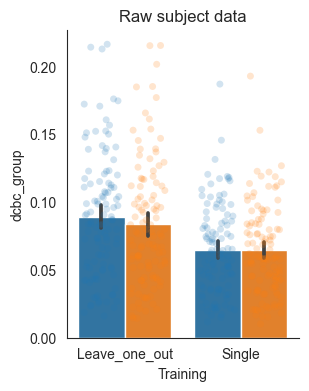

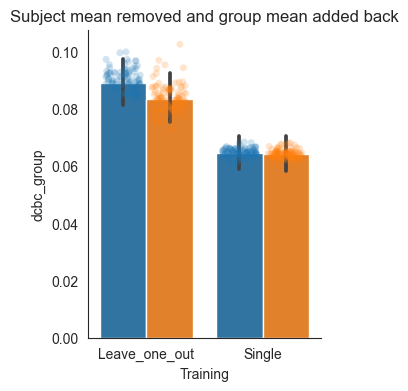

In [223]:
figsize = (3, 4)
plt.figure(figsize=figsize)
sb.barplot(data=Data_avg[(Data_avg['Training'].isin(trainings))], x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'])
sb.stripplot(data=Data_avg, x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'], jitter=0.3, dodge=True, alpha=0.2)
plt.legend([],[], frameon=False)
ax=plt.gca()
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Raw subject data')

plt.figure(figsize=figsize)
sb.stripplot(data=Data_norm, x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'], alpha=0.2, jitter=0.3, dodge=True)
sb.barplot(data=Data_avg[(Data_avg['Training'].isin(trainings))], x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'])
plt.legend([],[], frameon=False)
ax=plt.gca()
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Subject mean removed and group mean added back')


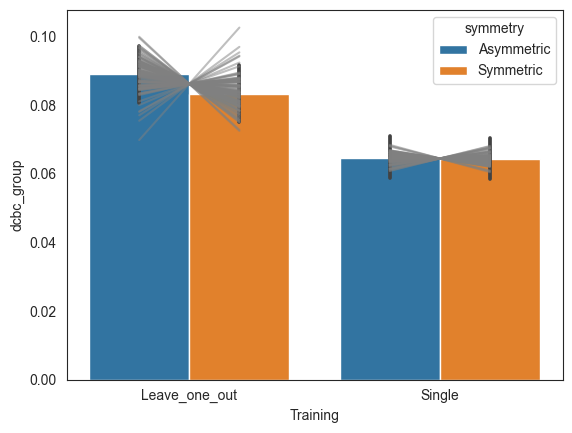

In [228]:
Data_avg = Data_avg[(Data_avg['Training'].isin(trainings))]

# Plot the barplot
plt.figure()
sb.barplot(data=Data_avg, x='Training', y='dcbc_group', hue='symmetry', hue_order=['Asymmetric', 'Symmetric'], order=trainings)

# Get the positions of the hue levels for each bar
positions = {
    ('Leave_one_out', 'Asymmetric'): -0.2,
    ('Leave_one_out', 'Symmetric'): 0.2,
    ('Single', 'Asymmetric'): 0.8,
    ('Single', 'Symmetric'): 1.2
}
# Plot the lineplot to connect the points for the same subjects
for training in trainings:
    training_data = Data_norm[Data_norm['Training'] == training]
    for subject in training_data['subj_id'].unique():
        subject_data = training_data[training_data['subj_id'] == subject]
        x_positions = [positions[(training, sym)] for sym in subject_data['symmetry']]
        y_positions = subject_data['dcbc_group'].values
        plt.plot(x_positions, y_positions, alpha=0.5, color='grey')

# Customize x-axis ticks to match the bar positions
plt.xticks([0, 1], ['Leave_one_out', 'Single'])

plt.show()


In [241]:
figsize = (2, 3)

# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
# Define the data
hues = Data_avg.symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data_avg.groupby(['Training', 'symmetry'])[
    'dcbc_group'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data_avg.groupby(['Training', 'symmetry'])[
    'dcbc_group'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(trainings)+1)
colors = colors[1:]

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(trainings):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)
    
    # Set a different hatch for every second bar
    ax.patches[j+1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(trainings)))
ax.set_xticklabels(trainings)
# Smaller xtick labels  
ax.tick_params(axis='x', which='major', labelsize=9)


# Get the positions of the hue levels for each bar
positions = {
    ('Leave_one_out', 'Asymmetric'): -0.2,
    ('Leave_one_out', 'Symmetric'): 0.2,
    ('Single', 'Asymmetric'): 0.8,
    ('Single', 'Symmetric'): 1.2
}
# Plot the lineplot to connect the points for the same subjects
for training in trainings:
    training_data = Data_norm[Data_norm['Training'] == training]
    for subject in training_data['subj_id'].unique():
        subject_data = training_data[training_data['subj_id'] == subject]
        x_positions = [positions[(training, sym)] for sym in subject_data['symmetry']]
        y_positions = subject_data['dcbc_group'].values
        plt.plot(x_positions, y_positions, alpha=0.25, color='black')

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar_av_dots.pdf', dpi=300)


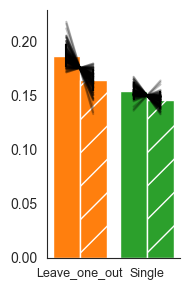

In [240]:
figsize = (2, 3)

# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
# Define the data
hues = Data_avg.symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data_avg.groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data_avg.groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(trainings)+1)
colors = colors[1:]

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(trainings):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)
    
    # Set a different hatch for every second bar
    ax.patches[j+1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(trainings)))
ax.set_xticklabels(trainings)
# Smaller xtick labels  
ax.tick_params(axis='x', which='major', labelsize=9)


# Get the positions of the hue levels for each bar
positions = {
    ('Leave_one_out', 'Asymmetric'): -0.2,
    ('Leave_one_out', 'Symmetric'): 0.2,
    ('Single', 'Asymmetric'): 0.8,
    ('Single', 'Symmetric'): 1.2
}
# Plot the lineplot to connect the points for the same subjects
for training in trainings:
    training_data = Data_norm[Data_norm['Training'] == training]
    for subject in training_data['subj_id'].unique():
        subject_data = training_data[training_data['subj_id'] == subject]
        x_positions = [positions[(training, sym)] for sym in subject_data['symmetry']]
        y_positions = subject_data['dcbc_indiv'].values
        plt.plot(x_positions, y_positions, alpha=0.25, color='black')

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_indiv_bar_av_dots.pdf', dpi=300)


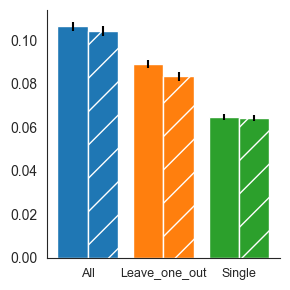

In [136]:
figsize = (3, 3)

# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
# Define the data
categories = Data_avg.Training.unique()
hues = Data_avg.symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data_avg.groupby(['Training', 'symmetry'])[
    'dcbc_group'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data_avg.groupby(['Training', 'symmetry'])[
    'dcbc_group'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(categories))

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(categories):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)
    
    # Set a different hatch for every second bar
    ax.patches[j+1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
# Smaller xtick labels  
ax.tick_params(axis='x', which='major', labelsize=9)

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar_avg.pdf', dpi=300)


## DCBC Individual: Single vs. Fusion atlas, Asymmetric vs Symmetric

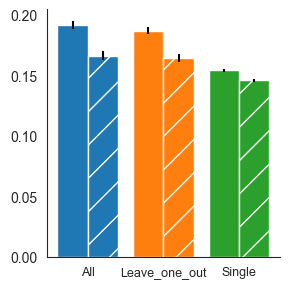

In [113]:
# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes, 2)

# Define the data
categories = Data.Training.unique()
hues = Data.symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data.groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data.groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(categories))

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(categories):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)

    # Set a different hatch for every second bar
    ax.patches[j + 1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
# Smaller xtick labels
ax.tick_params(axis='x', which='major', labelsize=9)

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar_individual_avg.pdf', dpi=300)


# Stats

In [123]:
# Add subject variables
Data['participant_id'] = ''
datasets = Data['test_data'].unique()

for dset in datasets:
    # Import participant info
    dataset = ds.get_dataset_class(ut.base_dir, dset)
    participants = dataset.get_participants().participant_id.tolist()
    participants = [dset + '_' + p for p in participants]
    select_rows = (Data['test_data'] == dset)
    Data['participant_id'][select_rows] = participants*int(len(select_rows)/len(participants))



/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_20297/66757159.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['participant_id'][select_rows] = participants*int(len(select_rows)/len(participants))
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_20297/66757159.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['participant_id'][select_rows] = participants*int(len(select_rows)/len(participants))
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_20297/66757159.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [124]:
# -- Single dataset parcellations: average across two halves within each subject for each model, K and symmetry -- #
# Step 1: Group the data for single dataset parcellations by subject
grouped_data = Data[Data['Training']=='Single'].groupby(['participant_id', 'K', 'symmetry'])
# Step 2: Get the highest/average value for each subject
averaged_data = grouped_data[['dcbc_indiv', 'dcbc_group']].mean() # .max() for highest value
# Step 3: Create a new DataFrame with one row per subject and the highest value
Data_single = averaged_data.reset_index()

# -- Fusion parcellations: average across two halves within each subject for each model, K and symmetry -- #
# Step 1: Group the data for fusion parcellations by subject
grouped_data = Data[Data['Training']=='Leave_one_out'].groupby(['participant_id', 'K', 'symmetry'])
# Step 2: Get the mean value for each subject
Data_fusion = grouped_data[['dcbc_indiv', 'dcbc_group']].mean().reset_index()

# Fused vs. Best single dataset: Group DCBC

In [125]:
# Save Data_fusion and Data_single to ../data/evaluation_dcbc_fusion.tsv and ../data/evaluation_dcbc_single.tsv
Data_fusion[Data_fusion['K'].isin([10, 20, 34, 40, 68])].to_csv(f'../data/evaluation_dcbc_fusion.tsv', sep='\t', index=False)
Data_single[Data_single['K'].isin([10, 20, 34, 40, 68])].to_csv(f'../data/evaluation_dcbc_single.tsv', sep='\t', index=False)

In [126]:
# -- Test averaged across all Ks -- #
# Single vs cross-validated Fused
dat1 = Data_single[(Data_single['symmetry'] == 'Symmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')


# -- Test for K=68 only -- #
# Single vs cross-validated Fused
dat1 = Data_single[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')


T = -4.466, p = 1.936e-05, df = 110
T = -2.820, p = 5.697e-03, df = 110


# Fused vs. Best single dataset: Individual DCBC

In [127]:
# -- Test averaged across all Ks -- #
# Single vs cross-validated Fused
dat1 = Data_single[(Data_single['symmetry'] == 'Symmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')

# -- Test for K=68 only -- #
# Single vs cross-validated Fused
dat1 = Data_single[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')


T = -2.564, p = 1.171e-02, df = 110
T = -2.564, p = 0.012, df = 110
T = -3.586, p = 5.018e-04, df = 110
T = -3.586, p = 0.001, df = 110


# Symmetric vs Asymmetric: Group DCBC

In [128]:
# -- Test for K=68 only : Symmetric vs Asymmetric 
# Fused atlas symmetric vs Fused atlas asymmetric 
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Asymmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Fusion asymmetric at 68')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')

# -- Averaged across Ks:
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Asymmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Fusion asymmetric')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')
# Show percentage reduction
print(f'Percentage reduction = {100*(1 - dat2["dcbc_group"].mean()/dat1["dcbc_group"].mean()):.2f}%')


# -- Averaged across Ks:
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_single[(Data_single['symmetry'] == 'Asymmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Single asymmetric')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')

# Symmetric fused atlas vs Asymmetric single dataset atlas cross-validated
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
dat2 = Data_single[(Data_single['symmetry'] == 'Asymmetric')  & (Data_single['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Single asymmetric at K68')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')

# --> No significant difference between asymmetric and symmetric in group dcbc! 


Fusion symmetric vs Fusion asymmetric at 68
T = -0.660, p = 5.108e-01, df = 110
T = -0.660, p = 0.511, df = 110

Fusion symmetric vs Fusion asymmetric
T = -2.788, p = 6.245e-03, df = 110
T = -2.788, p = 0.006, df = 110
Percentage reduction = -6.89%

Fusion symmetric vs Single asymmetric
T = 5.180, p = 1.013e-06, df = 110
T = 5.180, p = 0.000, df = 110

Fusion symmetric vs Single asymmetric at K68
T = 2.788, p = 6.249e-03, df = 110


# Symmetric vs Asymmetric: Individual DCBC

In [129]:
# -- Test for K=68 only : Symmetric vs Asymmetric 
# Fused atlas symmetric vs Fused atlas asymmetric 
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Asymmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Fusion asymmetric at K=68')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')


# -- Averaged across Ks:
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Asymmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Fusion asymmetric')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')
# Show percentage reduction
print(f'Percentage reduction = {100*(1 - dat2["dcbc_indiv"].mean()/dat1["dcbc_indiv"].mean()):.2f}%')

# -- Averaged across Ks:
dat1 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
dat2 = Data_single[(Data_single['symmetry'] == 'Asymmetric') ][['participant_id', 'dcbc_group', 'dcbc_indiv']].groupby(['participant_id']).mean()
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
# show degrees of freedom
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Single asymmetric')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')


# Symmetric fused atlas vs Asymmetric single dataset atlas cross-validated
dat1 = Data_single[(Data_single['symmetry'] == 'Asymmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 68) ]
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
df = len(dat1) - 1
# Show in scientific notation
print(f'\nFusion symmetric vs Single asymmetric at K=68')
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')

# --> No significant difference between asymmetric and symmetric in group dcbc! 


Fusion symmetric vs Fusion asymmetric at K=68
T = -4.081, p = 8.510e-05, df = 110
T = -4.081, p = 0.000, df = 110

Fusion symmetric vs Fusion asymmetric
T = -4.868, p = 3.800e-06, df = 110
T = -4.868, p = 0.000, df = 110
Percentage reduction = -13.77%

Fusion symmetric vs Single asymmetric
T = 1.812, p = 7.267e-02, df = 110
T = 1.812, p = 0.073, df = 110

Fusion symmetric vs Single asymmetric at K=68
T = -2.842, p = 5.338e-03, df = 110


# Granularity: Does K=68 perform better than K=40 in the individual? Is there a difference between K=20 and K=68 in the group?

In [130]:

# -- Group DCBC 68 vs 20 -- #
# Single vs cross-validated Fused
dat1 = Data_fusion[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 20) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')



# -- Group DCBC 68 vs 10 -- #
# Single vs cross-validated Fused
dat1 = Data_fusion[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 10) ]
res = stats.ttest_rel(dat1['dcbc_group'], dat2['dcbc_group'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')


# -- Individual DCBC 68 vs 40 -- #
# Single vs cross-validated Fused
dat1 = Data_fusion[(Data_single['symmetry'] == 'Symmetric')  & (Data_single['K'] == 68) ]
dat2 = Data_fusion[(Data_fusion['symmetry'] == 'Symmetric')  & (Data_fusion['K'] == 40) ]
res = stats.ttest_rel(dat1['dcbc_indiv'], dat2['dcbc_indiv'])
df = len(dat1) - 1
# Show in scientific notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3e}, df = {df}')
# Show in normal notation
print(f'T = {res.statistic:.3f}, p = {res.pvalue:.3f}, df = {df}')

T = -1.580, p = 1.170e-01, df = 110
T = -1.580, p = 0.117, df = 110
T = 2.783, p = 6.345e-03, df = 110
T = 2.783, p = 0.006, df = 110
T = 7.584, p = 1.143e-11, df = 110
T = 7.584, p = 0.000, df = 110
